In [1]:
import pandas as pd

## Write a code to import  Dataframe in Python

In [2]:
df = pd.read_csv('Statxo_Table1.csv')

In [3]:
print(df) # To see dataset present in the file

    Emp ID Region                  Name                    Department Month  \
0    10001   East          DeRusha, Joe  5255-Data/Connectivity Sales   Jan   
1    10002   East  De Pasquale, Richard      5256-Sales Mgt & Support   Jan   
2    10003   East        Dobbert, Susan               5257-Auto Sales   Jan   
3    10001   East          DeRusha, Joe  5255-Data/Connectivity Sales   Jan   
4    10002   East  De Pasquale, Richard      5256-Sales Mgt & Support   Jan   
5    10003   East        Dobbert, Susan               5257-Auto Sales   Jan   
6    10005   West         Dunton, Donna            5259-Sales Channel   Jan   
7    10007   West      De Sousa, Kristi            5263-Sales Support   Jan   
8    10004   East        Dillard, Susan                5258-IAP Sales   Jan   
9    10005   West         Dunton, Donna            5259-Sales Channel   Jan   
10   10006   West        De Vries, John                  5262-Auto GM   Jan   
11   10007   West      De Sousa, Kristi            5

In [4]:
print(df.Name) #To see name of the table

0             DeRusha, Joe
1     De Pasquale, Richard
2           Dobbert, Susan
3             DeRusha, Joe
4     De Pasquale, Richard
5           Dobbert, Susan
6            Dunton, Donna
7         De Sousa, Kristi
8           Dillard, Susan
9            Dunton, Donna
10          De Vries, John
11        De Sousa, Kristi
12         Defonso, Daniel
Name: Name, dtype: object


## Finding unique names

In [5]:
unique_names = df['Name'].unique()
print("Unique Names: ", unique_names) 

Unique Names:  ['DeRusha, Joe' 'De Pasquale, Richard' 'Dobbert, Susan' 'Dunton, Donna'
 'De Sousa, Kristi' 'Dillard, Susan' 'De Vries, John' 'Defonso, Daniel']


## Write the code to find top 3 sales with Name and Department

In [6]:
# To see data type of column 'sales'
print(df['Sales'].dtype)

object


In [7]:
# Converting 'Sales' column to numeric because of comma it is showing object type
# Remove commas from 'Sales' column and convert it to numeric
df['Sales'] = df['Sales'].str.replace(',', '').astype(float)

In [8]:
print(df['Sales'].dtype)

float64


In [9]:
top_sales = df.nlargest(3, 'Sales')[['Name', 'Department', 'Sales']]

In [10]:
print(top_sales)

                Name          Department     Sales
12   Defonso, Daniel      5264-ARD Sales  450000.0
7   De Sousa, Kristi  5263-Sales Support  400000.0
11  De Sousa, Kristi  5263-Sales Support  400000.0


## Replace "DeRusha, Joe" Name with "John" in D Column

In [11]:
df['Name'] = df['Name'].replace('DeRusha, Joe', 'John')

In [12]:
print(df.Name) #printing name to see the change

0                     John
1     De Pasquale, Richard
2           Dobbert, Susan
3                     John
4     De Pasquale, Richard
5           Dobbert, Susan
6            Dunton, Donna
7         De Sousa, Kristi
8           Dillard, Susan
9            Dunton, Donna
10          De Vries, John
11        De Sousa, Kristi
12         Defonso, Daniel
Name: Name, dtype: object


## Plot top 5 sales for each Region

In [13]:
import matplotlib.pyplot as plt

In [14]:
grouped = df.groupby('Region') #groupin by region to find top 5 in each region

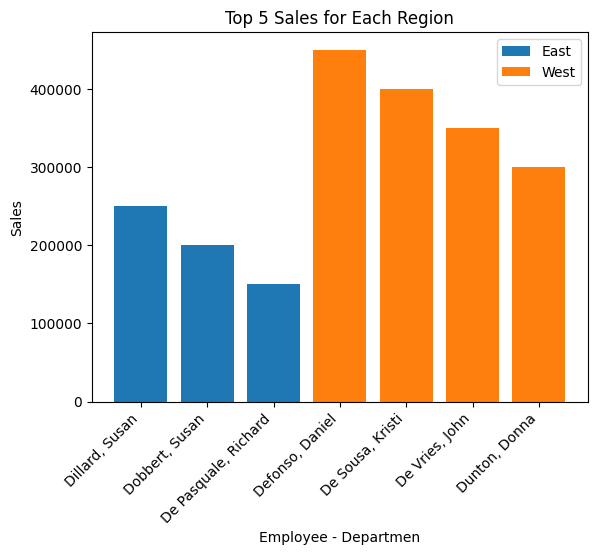

In [15]:
# Plot the top 5 sales for each region
for region, group in grouped:
    top_5_sales = group.nlargest(5, 'Sales')
    plt.bar(top_5_sales['Name'], top_5_sales['Sales'], label=region) 


# Add labels and title
plt.xlabel('Employee - Departmen') # to label x axis
plt.ylabel('Sales') # to label y axis
plt.title('Top 5 Sales for Each Region') # for title of the graph
plt.xticks(rotation=45, ha='right') #Here I rotate names at 45 degree so that we can see each name clearly or can say to prevent letters from overlaping)
plt.legend()

# Show the plot
plt.show()

## Plot the chart -> percentage contribution of sales for Unique Name

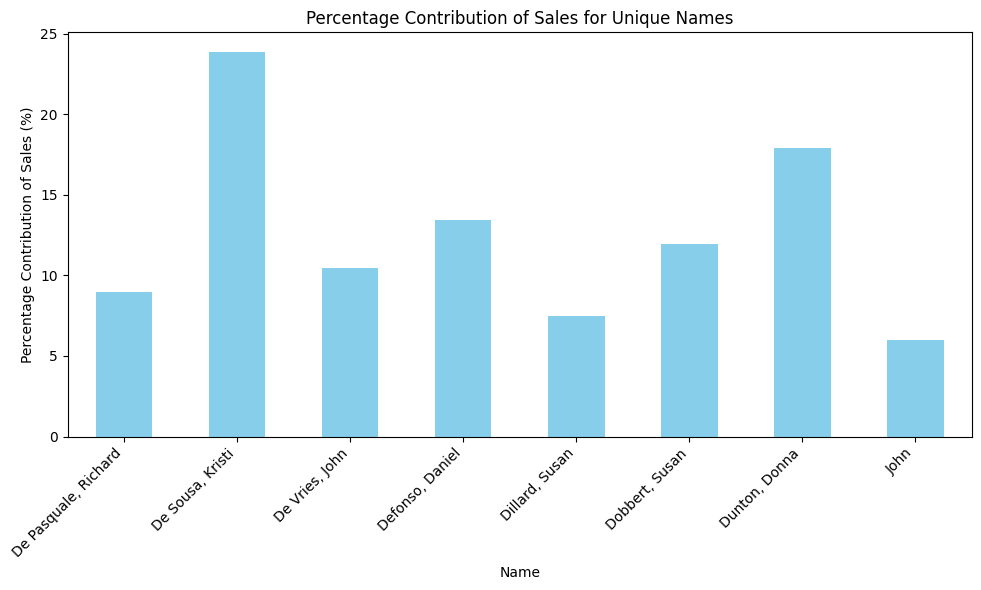

In [16]:
# Group the data by 'Name' and sum up the 'Sales' for each unique name
sales_by_name = df.groupby('Name')['Sales'].sum()

# Calculate the total sales
total_sales = df['Sales'].sum()

# Calculate the percentage contribution of each name's sales to the total sales
percentage_contribution = (sales_by_name / total_sales) * 100

# Plot the percentages
plt.figure(figsize=(10, 6))
percentage_contribution.plot(kind='bar', color='skyblue')
plt.title('Percentage Contribution of Sales for Unique Names')
plt.xlabel('Name')
plt.ylabel('Percentage Contribution of Sales (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()